In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy  as sp
from scipy import integrate
from scipy.integrate import odeint
from scipy.integrate import quad
from scipy.special import zeta
import scipy.special as sc

# SN : Irreducible Fraction

## Table of content 

1. MeV SN in low reheating temperature $T_{\text{RH}} \sim 5$ MeV.
2. SN at  MeV $ \leq T_{\text{RH}} < $  GeV.
3. SN at  GeV $ \leq T_{\text{RH}}  $.

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

$$ \mathcal{F}_{\nu_s,\text{Max}} = \text{Max}_{T} \left[\frac{\rho_{\nu_s}}{\rho_{DM}}\right]$$

In the following we two-neutrino mixing approximation.

### 1. MeV SN in low reheating temperature $T_{\text{RH}} \sim 5$ MeV.

We assume for the number density of sterile neutrinos  $f_s \ll f_{s}^{eq}$.

Analytically we have two regimes allowed in the low temperature regime regarding the mass of th SN. This is because for heavier SN , and for the range of temperatures explored here, the heavy neutrino mass needs to be taken into account and the averaged production rate of sterile neutrinos changes due to inverse decays, two-to-two particle processes and oscillations. 

For $m_{s} \leq 1$ MeV:

$$ n_{s} = 10 d_{\alpha} \sin^{2}(2\theta)\left(\frac{T_{rh}}{5 \text{MeV}}\right)^{3} n_{\alpha}$$
where $d_{\alpha}= 1.13$ (if only mixing with electron neutrino ) and $n_{\alpha} = 0.09 g T^{3}$, $g = 10.8$.

Therefore:

$$\mathcal{F}_{\nu_s} = \text{max}_{T} \left[\frac{\rho_{\nu_s}}{\rho_{DM}}\right] = \text{max}_{T} \left[\frac{10 d_{\alpha} \sin^{2}(2\theta)\left(\frac{T_{rh}}{5 \text{MeV}}\right)^{3} 0.09 g T^{3} M}{\rho_{DM}}\right]$$

For $m_{s} \geq 1$ MeV:
$$n_s \approx 0.09gT^{3}\sin^{2}{(2\theta)}\left(\frac{m_s}{\text{MeV}}\right)^{3}2.1\times 10^{-3}e^{-m_s/T_{TR}}\\
    \times  \left\{ \left(\frac{7}{3} + \frac{6+144\zeta(3)}{\pi^{4}}\right) + \frac{2^{3}\times 7}{3}\left( 1+ \frac{m_s}{T_{RH}} + \left( \frac{3}{2^3} + \frac{3^4 \zeta(3)}{7\pi^4}\right)\frac{m_s^{2}}{T_{RH}^{2}}\right)\frac{T_{RH}^{3}}{m_s^{3}}\right.\\
    +  \left. \left( 24+ 144\zeta(3) + 12\frac{m_s}{T_{RH}} +\frac{7}{2} \frac{m_s^{2}}{T_{RH}^{2}} + \frac{1}{2} \frac{m_s^{3}}{T_{RH}^{3}}\right)\frac{m_s}{ 4\pi^{4}T_{RH}}\right\}$$


In [3]:
def low_interaction(d,g,T,dm,f, M):

    '''This function calculates for the two mass regimes the interaction value given a specific density fraction.
    The imputs for this function are:
    d = mixing value
    g = degrees of freedom
    T = reheating temperature
    dm = DM averaged density 
    f = density fraction
    M = Sterile neutrino mass

    The function gives back, the mass and the interaction. Inside the function everything is in MeV.
    '''
    low_inter=[]
    a = f*dm 
    M_low=[]
    for i in range(len(M)):
        if (M[i]/1e3) <= 1:
            b=  10*d*0.09*g*(T**3)*(M[i]/1e3)
            low_inter.append(a/b)
            M_low.append(M[i]/1e3)
        else:
            n = 0.09*g*(T**3)*(M[i]/1e3)
            x= (M[i]/1e3)/T
            p = 2.1e-3*d*np.exp(-x)*(M[i]/1e3)**3
            y= (7/3 + ((6 + 144*zeta(3))/np.pi**4)) + (1/x**3)*((2**3)*7/3)*(1+ x + (3/8 + (zeta(3)*(3**4)/(7*np.pi**4)))*x**2)
            l = (24+(144*zeta(3)) +12*x +(7/2)*x**2 + (1/2)*x**3)* (x/(4*np.pi)) 
            z= y+l
            low_inter.append(a/(z*p*n))
            M_low.append(M[i]/1e3)
    return low_inter, M_low

In [4]:
######################################################## Setting values #############################################################
T= 5                               #MeV
GeV = 1e3                          #MeV
arc_cm = 1.98e-14                  #GeV 
dm = 0.45                          #GeV/cm^3
dm1 = dm*arc_cm*GeV**4             # dm averaged density in MeV
d = 1.13                           # sterile neutrino mixing if only mixes with  \nu_{e}
g = 10.9                           # degrees of freedom
M = np.linspace(1e-1, 5e7, 10000)  #this is in keV , inside the function is converted to meV

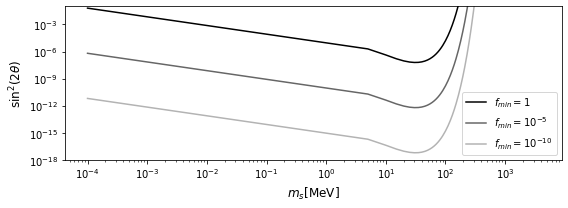

In [5]:
################################################################## Test ###################################################################

f1 = 1
f2 = 1e-5
f3 = 1e-10
low_int1 = low_interaction(d,g,T,dm1,f1, M)
low_int2 = low_interaction(d,g,T,dm1,f2, M)
low_int3 = low_interaction(d,g,T,dm1,f3, M)

################################################################## Plot ###################################################################

plt.figure(figsize=(8,3))
plt.loglog(low_int1[1],low_int1[0], 'k-', label='$f_{min}=1$')
plt.loglog(low_int2[1],low_int2[0], '-', color='0.4', label='$f_{min}=10^{-5}$')
plt.loglog(low_int3[1],low_int3[0], '-', color='0.7', label='$f_{min}=10^{-10}$')
plt.xlabel(r'$m_s$[MeV]', size=12)
plt.ylim(1e-18, 1e-1)
plt.legend()
plt.ylabel(r'$\sin^{2}(2\theta)$', size=12)
plt.tight_layout()

Using the Boltzmann Equation

In [6]:
def integrand1(p,c,d,T,M):
    g = 10.9
    E= np.sqrt(p**2 + (M/1e3)**2)
    fe = 1/(np.exp((E/T) + 1))
    GeV = 1e3
    gamma = 1/4*d*(T**4)*E
    output = (1/np.pi**2)*(fe)*c*gamma*(p**2)/E
    return output 

In [7]:
is_1=[]
mass_1=[]
is_2=[]
mass_2=[]
is_3=[]
mass_3=[]
Ratio=[]

T = 5 #MeV
d = 1.13 
M = np.logspace(np.log10(1e-1), np.log10(1e10), 500)
c = np.logspace(np.log10(1e1), np.log10(1e-30), 500)
for i in range(len(M)):
    dm1 = dm*arc_cm*GeV**4 
    for j in range(len(c)):
        #if (M[i]/1e3)<=1:
        funct = lambda p : integrand1(p, c[j], d, T, M[i])
        sol = quad(funct,0, np.inf)[0]
        den = sol*(M[i]/1e3)
        Ratio.append(den/dm1)
        if 1<(den/dm1)<= 1.1:
            is_1.append(c[j])
            mass_1.append(M[i]/1e3)
        if 1e-5<(den/dm1)<= 1.1e-5:
            is_2.append(c[j])
            mass_2.append(M[i]/1e3)
        if 1e-10<(den/dm1)<= 1.1e-10:
            is_3.append(c[j])
            mass_3.append(M[i]/1e3)


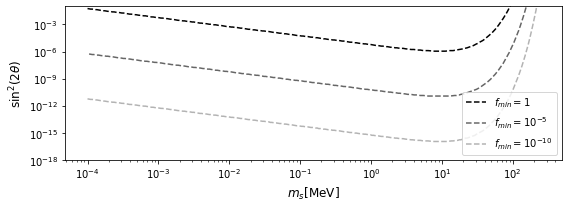

In [10]:

plt.figure(figsize=(8,3))
#plt.loglog(low_int1[1],low_int1[0], 'k-', label='$f_{min}=1$')
#plt.loglog(low_int2[1],low_int2[0], '-', color='0.4', label='$f_{min}=10^{-5}$')
#plt.loglog(low_int3[1],low_int3[0], '-', color='0.7', label='$f_{min}=10^{-10}$')

plt.loglog( mass_1, is_1, 'k--', label='$f_{min}=1$')
plt.loglog( mass_2, is_2, '--', color='0.4', label='$f_{min}=10^{-5}$')
plt.loglog( mass_3, is_3, '--', color='0.7', label='$f_{min}=10^{-10}$')
plt.xlabel(r'$m_s$[MeV]', size=12)
plt.ylim(1e-18, 1e-1)
plt.legend()
plt.ylabel(r'$\sin^{2}(2\theta)$', size=12)
plt.tight_layout()

### 2. MeV SN at  MeV $ \leq T_{\text{RH}} <$ GeV.

For this temperatures the conditions and regimes mantioned above holds with the subtlety that the production rate need to be parametrized by an additional function $\lambda(T)$ accounting for  the number and type of available
relativistic species in the cosmic plasma, 
$$ \Gamma(T) = \frac{1}{2}\sin^{2}{(2\theta)} \lambda(T) G_{F}^{2} E T^{4}$$

For mixing only with the electronic neutrino $\lambda(T) \sim 79$ and it remains constant along the process.
We fixed $T_{\text{TR}}= 100$ MeV

In [11]:
################################################################## Test ###################################################################

f1 = 1
f2 = 1e-5
f3 = 1e-10
M = np.linspace(1e-1, 5e7, 20000) 
low_int1_1 = low_interaction(79,g,100,dm1,f1, M)
low_int2_1 = low_interaction(79,g,100,dm1,f2, M)
low_int3_1 = low_interaction(79,g,100,dm1,f3, M)

In [12]:
############################################################## Numerical Test ############################################################

is_11=[]
mass_11=[]
is_21=[]
mass_21=[]
is_31=[]
mass_31=[]
Ratio1=[]

T = 100 #MeV
d = 79
M = np.logspace(np.log10(1e-1), np.log10(1e7), 500)
c = np.logspace(np.log10(1e1), np.log10(1e-30), 500)

for i in range(len(M)):
    dm1 = dm*arc_cm*GeV**4 
    for j in range(len(c)):
        funct = lambda p : integrand1(p, c[j], d, T, M[i])
        sol = quad(funct,0, np.inf)[0]
        den = sol*(M[i]/1e3)
        Ratio1.append(den/dm1)
        if 1<(den/dm1)<= 1.1:
            is_11.append(c[j])
            mass_11.append(M[i]/1e3)
        if 1e-5<(den/dm1)<= 1.1e-5:
            is_21.append(c[j])
            mass_21.append(M[i]/1e3)
        if 1e-10<(den/dm1)<= 1.1e-10:
            is_31.append(c[j])
            mass_31.append(M[i]/1e3)

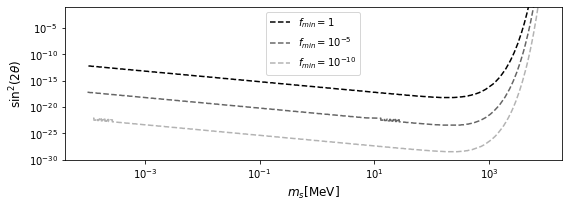

In [15]:
################################################################## Plot ###################################################################

plt.figure(figsize=(8,3))
#plt.loglog(low_int1_1[1],low_int1_1[0], 'k-', label='$f_{min}=1$')
#plt.loglog(low_int2_1[1],low_int2_1[0], '-', color='0.4', label='$f_{min}=10^{-5}$')
#plt.loglog(low_int3_1[1],low_int3_1[0], '-', color='0.7', label='$f_{min}=10^{-10}$')

plt.loglog( mass_11, is_11, 'k--', label='$f_{min}=1$')
plt.loglog( mass_21, is_21, '--',  color='0.4', label='$f_{min}=10^{-5}$')
plt.loglog( mass_31, is_31, '--', color='0.7', label='$f_{min}=10^{-10}$')

plt.xlabel(r'$m_s$[MeV]', size=12)
plt.ylim(1e-30, 1e-1)
plt.legend()
plt.ylabel(r'$\sin^{2}(2\theta)$', size=12)
plt.tight_layout()

### 3. SN at  $ T_{\text{RH}} \geq  $ GeV.

Here tto find the interaction responsable of producing SN we take the folloring operatorto describe the rate:

  $$\gamma_{IK} = \sum_{a}\frac{|Y_{Ia}|^{2}\text{Im}\Pi_{R}(K)}{E_{I}}.$$

To determine $\text{Im}\Pi_{R}(K)$, we can first assume that we are at a temperature in which the neutral component of the Higgs field has an expectation value, $v$.

In this case we can have two escenarios contributing:  directly and indirectly. For the first type we have the case in the Higgs field can represent a propagating mode, This leads to process such $1 + n \Longleftrightarrow 2 + n $ and $2 \Longleftrightarrow 2$, $\text{I}_{m}\Pi_{R}(K)|_{\text{direct}} \sim g^{2} T^{2}$.  For the letter case the Higgs field could be replaced by its expectation value then the right handed neutrinos are produced by means of the subsequent oscillation of active neurtinos, 


  $$ \text{Im}\Pi_{R}(K)|_{\text{indirect}} = \frac{v^{2}}{2} \frac{M^{2}k_{0}\Gamma}{(M^{2}-m_{l}^{2})^{2}+ k_{0}^{2}\Gamma^{2}}, $$

taking $\Gamma \sim g^{2}T/ \pi$ we get,

$$\text{Im}\Pi_{R}(K)|_{\text{indirect}} = \frac{v^{2}}{2} \frac{M^{2}g^{2}T^{2}}{(M^{2}-(gT)^{2})^{2}+ (gT)^{4})}.$$
Finally ywe can write down the rate as,

$$\text{Im}\Pi_{R}(K) = \text{Im}\Pi_{R}(K)|_{\text{direct}}+ \text{Im}\Pi_{R}(K)|_{\text{indirect}} $$


In [16]:
def integrand2(p,c,T,M):
    g = 10.9
    E= np.sqrt(p**2 + (M/1e3)**2)
    fe = 1/(np.exp((E/T) + 1))
    GeV = 1e3
    v= 246*GeV
    gamma = (g**2)*(T**2) + ((v**2)/2)*(g**2)*(M**2)*(T**2)/((M**2 - (g*T)**2)**2 + (g*T)**4)
    output = (2/np.pi**2)*(fe)*c*gamma*(p**2)/E
    return output 

In [26]:
interaction=[]
massneutrino=[]
interaction1=[]
massneutrino1=[]
interaction2=[]
massneutrino2=[]
interaction20=[]
massneutrino20=[]
Ratio=[]
T = 15*1e3
M = np.logspace(np.log10(1e-3), np.log10(1e9), 500)
c = np.logspace(np.log10(1e-1), np.log10(1e-35), 500)
for i in range(len(M)):
    dm1 = dm*arc_cm*GeV**4
    for j in range(len(c)):
        funct = lambda p : integrand2(p, c[j],T, M[i])
        sol = quad(funct,0, np.inf)[0]
        den = sol*(M[i]/1e3)
        Ratio.append(den/dm1)
        if 1.0<(den/dm1)<= 1.05:
            interaction.append(c[j])
            massneutrino.append(M[i]/1e3)
        if 1e-2<(den/dm1)<= 1.05e-2:
            interaction20.append(c[j])
            massneutrino20.append(M[i]/1e3)
        if 1e-5<(den/dm1)<= 1.05e-5:
            interaction1.append(c[j])
            massneutrino1.append(M[i]/1e3)
        if 1e-10<(den/dm1)<= 1.05e-10:
            interaction2.append(c[j])
            massneutrino2.append(M[i]/1e3)

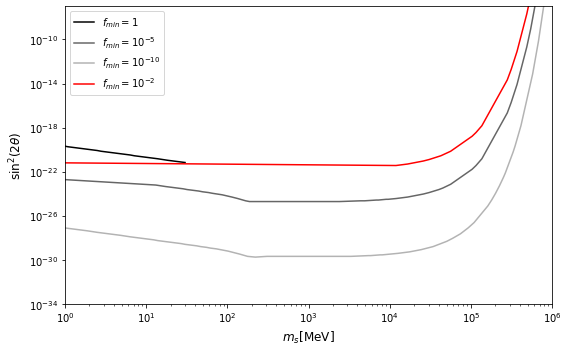

In [27]:
plt.figure(figsize=(8,5))
plt.loglog(massneutrino, interaction, 'k-', label=r'$f_{min}=1$')
plt.loglog(massneutrino1, interaction1, '-', color='0.4', label=r'$f_{min}=10^{-5}$')
plt.loglog(massneutrino2, interaction2,'-', color='0.7', label=r'$f_{min}=10^{-10}$')
plt.loglog(massneutrino20, interaction20,'r-',  label=r'$f_{min}=10^{-2}$')
plt.ylim(1e-34,1e-7)
plt.xlim(1e0, 1e6)
plt.xlabel(r'$m_s$[MeV]', size=12)
plt.ylabel(r'$\sin^{2}(2\theta)$', size=12)
plt.legend()
plt.tight_layout()
#plt.savefig('f_min_GeV.pdf', format='pdf')